## Name :- Varun Biren Majithia
## Student ID :- 8894799

# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

## Getting the data to Jupyter Environment

In [2]:
df = pd.read_csv("C://Users//Admin//Downloads/pd_speech_features.csv")
df.head(n=25)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


#### From the above observations we can see that our data has high dimensions and we need to treat the 755 columsn and rows for our model to generate accurate results or it might generate overfit results

# Treating the rows to using groupby fuction and calculating its mean so we have the correct represenation of data of all patients

In [3]:
df = df.groupby('id').mean().reset_index()

#### The above groupby function will group the rows of each and every unique patient and get its mean. This will enable us to have a correct representation of the data and allow our model to have a good input for learning and understanding patterns

## Checking the shape of the Data

In [4]:
df.shape

(252, 755)

## Checking the info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 755 entries, id to class
dtypes: float64(754), int64(1)
memory usage: 1.5 MB


## Checking the five summary statistics

In [6]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.890329,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,62.750000,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,125.500000,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,188.250000,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,251.000000,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


# Five summary stats after treating rows 

In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.890329,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,62.750000,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,125.500000,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,188.250000,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,251.000000,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


## Checking for null values in the dataset

In [8]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

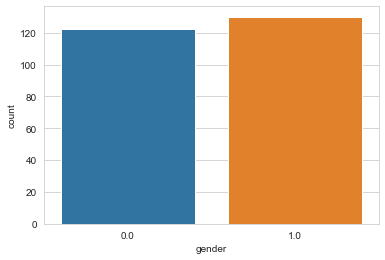

In [9]:
sns.set_style("whitegrid")
sns.countplot(x = "gender",data = df)

## Checking for class imbalance in the dependent feature

<AxesSubplot: xlabel='class', ylabel='count'>

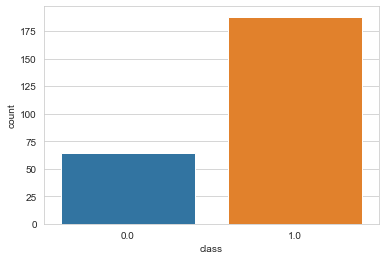

In [10]:
sns.set_style("whitegrid")
sns.countplot(x = "class",data = df)

#### From the above visualization we can clearly see that there is a significant class imbalance in our variable that has to be predicted "class". Class imbalance can lead to biased model training and prediction, as the classifier may favor the majority class and perform poorly on the minority class. To cater above problem I have oversampled the minority class using SMOTE oversampling techniques so that the minority class samples are equal to the majority of class

#### Reasons to oversample and not undersample As in undersampling we bring down the majority class label to the count of minority class label and then fit the model but in this case the minority class has very less values and if we do undersampling we might loose useful information. So, Oversampling was the best technique in my opinion

In [11]:
X = df.drop(columns=['class']) 
y = df['class']

## Oversampling using SMOTE as discussed above

#### In medical, fraud detection identifying the minority class is often of higher importance. SMOTE can increase the sensitivity (true positive rate) of the classifier, which means it becomes better at identifying instances of the minority class. So we can effictively identify the patients with the health conditon and hence prevent type 1 error

In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Visualizing the dependent variable after SMOTE

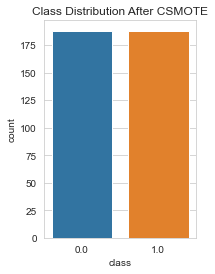

In [38]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)  # Use the resampled target variable directly
plt.title('Class Distribution After CSMOTE')
plt.show()

## Data Preprocessing

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Dimensionality Reduction

#### By transforming the dataset into a lower-dimensional space, PCA is an effective method for reducing the dataset's dimensionality. By eliminating less informative elements, it helps retain the most important variables (predictors). With the help of PCA we can reduce the number of intecorrelated features which are redundant and cause overfitting

#### As our dataset has 755 columns (predictors) it might cause significant overfitting and may give biased results so we need to cover maximum variance and reduce the dimensionality as well

In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Finding the optimal number of Principal Components needed to cover 90% of the variance 

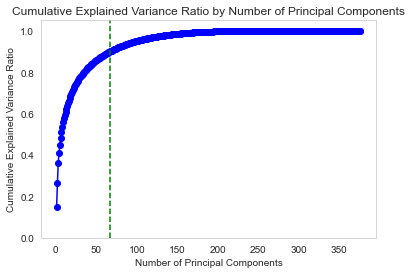

In [15]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Find the number of componentsm that cover 90% of variance
threshold_var = 0.90
num_components_to_retain = np.argmax(cumulative_var >= threshold_var) + 1


# Visualize the explained variance ratio for each principal component
plt.bar(range(1, len(cumulative_var) + 1), cumulative_var)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color='b')
plt.axvline(x=num_components_to_retain, color='g', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid()
plt.show()

# Total Number of Components Needed to cover 90% of variance

In [35]:
print("Total Number of Principal Components needed to cover 90% of the variance are",num_components_to_retain)

Total Number of Principal Components needed to cover 90% of the variance are 67


# Visualizing the contibution of each Principal Component

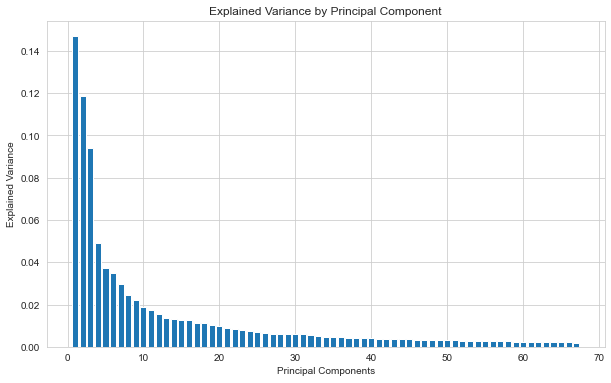

In [36]:
plt.figure(figsize=(10, 6))
explained_var = pca.explained_variance_ratio_
number_of_components = len(explained_var)

plt.bar(range(1, number_of_components + 1), explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

# Explained Variance

In [37]:
explained_var.sum()

0.8996681414638504

# Fitting PCA after finding the optimal PC's

In [19]:
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_scaled)

# Creating a new data frame for the reduced data

In [20]:
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(num_components_to_retain)])

In [21]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
0,14.283836,-5.699086,-5.392136,-0.096801,-3.219615,-4.597017,-1.037640,1.092601,-0.093425,-0.705981,...,0.332100,-0.517118,-0.401585,-0.787988,-1.464206,1.652785,2.541335,-0.830150,1.250661,0.189567
1,10.907193,17.079039,13.180222,-3.782345,-6.237503,17.314168,-3.126975,-7.731240,-3.538724,-6.702245,...,-1.388225,1.715541,0.154871,1.868829,-3.904058,-1.565278,-1.308242,-1.636744,3.339228,1.569200
2,-1.333149,-4.447593,5.361943,-4.110602,-0.014048,2.664618,-1.359437,-1.260581,0.043967,0.163862,...,-1.957818,-1.460260,0.023413,-0.544630,0.890405,-1.240890,0.159500,0.339618,0.589537,2.089935
3,-9.585611,1.425399,-10.700743,1.128981,-0.595259,-0.013279,0.483933,-0.015960,0.553042,1.039337,...,-0.706891,-0.460892,-0.314351,0.679503,0.188149,2.245481,0.814098,0.956299,-0.858616,-1.398324
4,1.222365,7.305838,-17.127875,-2.660138,6.074176,-1.010801,-0.747272,-6.345145,-1.928262,0.238401,...,-0.997364,-0.510576,-1.202526,1.950180,-0.050291,1.534242,-0.472389,1.364114,0.670188,-1.197288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,-19.615512,1.461355,-9.997912,0.862267,4.633911,-0.777879,-7.771558,3.067722,4.322350,4.630730,...,1.342105,-0.573631,0.378083,0.785000,-0.283238,0.074114,0.116337,-0.368604,-0.932961,-0.290843
372,8.593285,1.366600,10.405726,-2.338638,-0.943229,-9.878055,-2.521469,4.972158,-7.658438,0.312022,...,0.271546,1.273160,0.006239,-0.450946,-0.635508,-0.112892,0.015604,-0.680751,-0.177679,-0.123338
373,5.415325,-13.491368,26.720923,28.035749,20.701620,-12.011040,-7.303778,-3.259193,0.124522,-7.695610,...,-0.611573,-0.169686,-0.678191,0.685952,0.415929,-0.059641,-0.650743,-0.331540,-0.640432,-0.683484
374,-2.924367,-7.643126,4.463702,0.811415,-6.193625,0.518969,-1.685073,2.842881,-0.165865,-0.228174,...,0.874228,0.403912,-0.147543,-0.175135,-0.467587,-0.767808,0.750135,-0.399311,-0.084246,-0.201520


# Splitting Into train and test Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y_resampled, test_size=0.2, random_state=4799)

# Fitting Support Vector Machine Algorithm with kernel as "rbf"

In [23]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC()

# Reasons to choose "rbf" kernel 

#### RBF is capable enough of capturing non-linear relationship between the features and the target varible. Moreover, as there are too many features the complexity is high and there are features with different data distributions, Hence it makes rbf a good choice as it adapts really well with different distributions

## Making predictions on test data

In [24]:
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
313,-23.942375,2.147913,-9.565133,3.254396,-3.215962,-4.856308,2.857514,-3.900677,4.001199,-0.528135,...,-0.630576,1.185611,0.510549,-0.767363,0.934552,-0.096387,0.231820,0.157141,-1.088116,0.467062
292,-14.694041,-1.598997,4.091033,4.205218,-0.513253,-1.043362,2.222821,-8.300630,0.553262,-4.656909,...,-0.021161,-0.550608,0.436598,-0.242681,-1.153991,-0.020095,-1.058930,0.310186,-0.339528,-0.673261
36,-1.437190,-5.656208,0.805810,3.904469,-4.868615,-1.961339,2.429247,-0.421298,0.266425,2.623599,...,-0.804425,-0.730857,-0.114229,-1.585811,0.280908,1.201847,-0.952766,-0.034814,1.012473,-0.218957
43,4.610312,-6.173134,1.376963,-5.029353,-0.001391,3.537819,-8.339070,2.531442,-0.005725,-2.176697,...,0.507767,0.851001,0.347153,0.807800,0.841234,2.518476,2.360080,-1.156748,2.102806,-2.498118
63,19.420131,-4.030915,-5.720689,-2.067810,-1.891517,-5.828763,-1.075344,-4.023025,0.274167,0.135497,...,-1.059857,0.024847,1.132445,-0.144195,-0.934413,0.799711,0.919685,-0.575018,-0.433201,-0.307908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-8.812813,11.796127,4.654986,-14.465075,11.227248,-12.040731,10.290310,7.791831,-5.195922,5.281329,...,0.307227,1.239139,0.876629,0.689371,-1.142772,0.751720,-0.860092,1.754950,-0.001498,2.211178
125,-7.773444,1.110005,0.609082,-1.884163,0.516440,4.134613,0.906709,2.166779,-0.437049,-3.292860,...,0.768833,1.560697,0.762689,-2.099117,-0.050932,1.455450,-0.011059,0.771160,-0.036562,-0.373341
100,14.398027,-2.289227,-1.559433,6.524365,4.516610,0.601947,5.850371,3.973490,2.690374,4.657123,...,0.396377,2.489818,-0.705847,-0.275194,-1.205069,0.080104,-0.123578,0.858861,1.801470,1.327157
41,-25.008692,2.459404,-9.732649,3.537450,-4.356513,-5.629705,4.191986,-4.389088,4.317695,-1.751474,...,-1.413155,1.420012,0.411711,-1.515577,1.348537,-0.241337,0.126728,0.278721,-0.431161,0.652214


In [25]:
y_pred = classifier.predict(X_test)

## Patient’s Parkinson’s disease with one instance of the dataset.

In [27]:
new_instance = pca_df.iloc[0].values.reshape(1, -1)

## Prediction of the instance

In [28]:
classifier.predict(new_instance)

array([1.])

## Actual Value of the randomly predicted instance

In [29]:
y_resampled.iloc[0]

1.0

#### From the above observation we can see that the model correctly predicted the instance

## Performing Cross Validation considering scoring parameter as "accuracy"

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X_train,y_train,cv=10,scoring = "accuracy")
scores

array([0.96666667, 0.86666667, 0.86666667, 0.9       , 0.8       ,
       0.86666667, 0.83333333, 0.86666667, 0.83333333, 0.9       ])

## My Inferences on Model Performance

#### The SVM model is consistently performing well and demonstrates an accuracy of more than 85% on 7 out of 10 folds with some folds reaching as good as 96.6%. This suggests that the model has good generalization  abilities and performs  well on maximum subsets of the entire dataset. Generalization is very essential as it helps us to know how well the model will perform on usseen data

#### Considering such a high accuracy and good consitency  SVM model with "RBF" as kernel appears to be a good performer on the data

## Mean Cross Validation Accuracy

In [31]:
print("The mean of Cross Validation accuracy over 10 folds is",scores.mean())

The mean of Cross Validation accuracy over 10 folds is 0.8699999999999999


#### The mean scores of CV helps us to understand the unbiased estimate of out model's performance. As each fold of the cv is a result of a different subset of the data, taking mean will allow to interpret the results that are not biased towards a specific split. As it shows the overall performance it helps us to understand the generalization capabilities of the model to predict unseen data.

In [32]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf = confusion_matrix(y_test, y_pred)
cf

Confusion Matrix:


array([[37,  4],
       [ 5, 30]], dtype=int64)

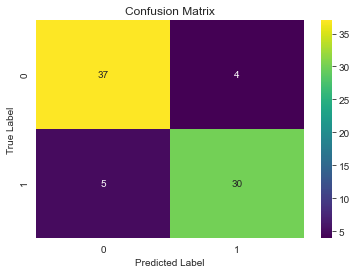

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Interpretation on Confusion Matrix

#### True Negatives: The number of cases where the actual label was negative "0" and model predicted it correctly are 37 samples
#### False Positives : The number of cases where the true class "0" but model incorrectly predicted it as "1" (Positive) are 4.
#### False Negative: The number of cases where the true class is "1" but the model incorrectly predicted it as "0" are 5
#### True Positive : The number of cases where the actual label was Positive "1" and model predicted it correctly as "1" (Positive) are 30 samples.

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.881578947368421
Precision: 0.8823529411764706
Recall: 0.8571428571428571
F1 Score: 0.8695652173913043


## Interpreting the above evaluation metrics

#### Accuracy represents the number of correclty classified outcomes out of total outcomes. In our case the model has correctly classified 88.15% of the total outcomes 

#### Precision shows the ability of the model to correctly classify positive class out of all the instanced predicted as positives. In our case the precision is 88.23% if our model predicts that a class is positve it is correctly predicted 88.23% of the times

#### Recall is also called as sensitivity measures the model's ability to correctly identify positive instances out of all the actual positive instances the recall is approximately 85.71%. This means that the model correctly identifies about 85..71% of the actual positive instances.

#### The F1 score is the harmonic mean of precision and recall and provides a balance between the two metrics.higher a higher fl score value indicates a better balance between precision and recall. In our case, the F1 score is approximately 86.95%.